In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os, glob, shutil

In [6]:
input_dir = "080263/chap11/data/pets"
glob_dir = input_dir + '/*.jpg'

images = [cv2.resize(cv2.imread(file), (224,224)) for file in glob.glob(glob_dir)]
paths = [file for file in glob.glob(glob_dir)]
images = np.array(np.float32(images).reshape(len(images),-1)/255)

In [8]:
model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224,224,3))
predictions = model.predict(images.reshape(-1,224,224,3))
pred_images = predictions.reshape(images.shape[0], -1)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 499ms/step


In [12]:
k = 2
kmodel = KMeans(n_clusters=k, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
# shutil.rmtree("080263/chap11/data/output")
for i in range(k):
    os.makedirs("080263/chap11/data/output" + str(i))
for i in range(len(paths)):
    shutil.copy2(paths[i], "080263/chap11/data/output" + str(kpredictions[i]))

In [13]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters=k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric='euclidean'))
    kl.append(k)

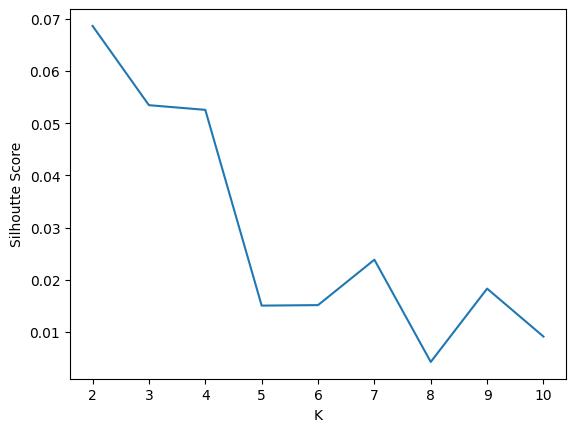

In [14]:
plt.plot(kl, sil)
plt.ylabel("Silhoutte Score")
plt.xlabel('K')
plt.show()

In [15]:
# 가우시안 혼합 모델 (Gaussian Mixture Model)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
X_train = np.load("080263/chap11/data/data.npy")

mean:
 [[3.0363831  3.09828041]
 [1.60629419 1.3470999 ]]

covariances:
 [[[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]

 [[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]]


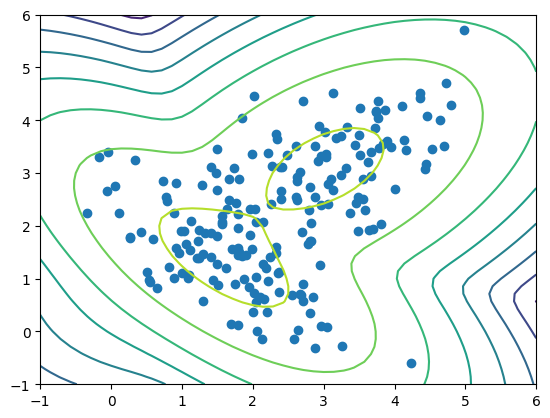

In [21]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

print("mean:\n", gmm.means_)
print()
print("covariances:\n", gmm.covariances_)

X, Y = np.meshgrid(np.linspace(-1,6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

In [30]:
import numpy as np
from sklearn.datasets import load_digits
from minisom import MiniSom
from pylab import plot, axis, show, pcolor, colorbar, bone

digits = load_digits()
data = digits.data
labels = digits.target

SOM 초기화.

. SOM 진행 종료


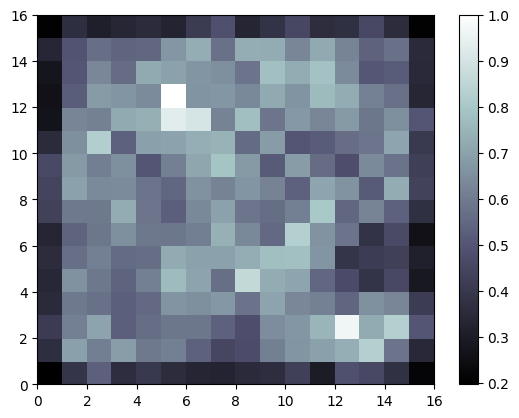

In [31]:
som = MiniSom(16, 16, 64, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
print("SOM 초기화.")
som.train_random(data, 10000)
print("\n. SOM 진행 종료")

bone()
pcolor(som.distance_map().T)
colorbar()

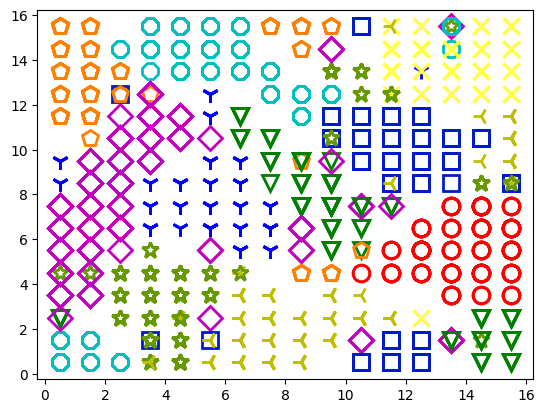

In [34]:
labels[labels=='0'] = 0
labels[labels=='1'] = 1
labels[labels=='2'] = 2
labels[labels=='3'] = 3
labels[labels=='4'] = 4
labels[labels=='5'] = 5
labels[labels=='6'] = 6
labels[labels=='7'] = 7
labels[labels=='8'] = 8
labels[labels=='9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ['r', 'g', 'b', 'y', 'c', (0,0.1,0.8), (1,0.5,0), (1,1,0.3), 'm', (0.4,0.6,0)]
for cnt, xx in enumerate(data):
    w = som.winner(xx)
    plot(w[0]+.5, w[1]+.5, markers[labels[cnt]],
         markerfacecolor='None', markeredgecolor=colors[labels[cnt]],
         markersize=12, markeredgewidth=2)